## import dependencies

In [96]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## explore the data

In [97]:
df = pd.read_csv('zomato.csv')
df.head()

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1/5,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1/5,787,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,https://www.zomato.com/SanchurroBangalore?cont...,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8/5,918,+91 9663487993,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari
3,https://www.zomato.com/bangalore/addhuri-udupi...,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7/5,88,+91 9620009302,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
4,https://www.zomato.com/bangalore/grand-village...,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8/5,166,+91 8026612447\r\n+91 9901210005,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari


In [98]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51717 entries, 0 to 51716
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   url                          51717 non-null  object
 1   address                      51717 non-null  object
 2   name                         51717 non-null  object
 3   online_order                 51717 non-null  object
 4   book_table                   51717 non-null  object
 5   rate                         43942 non-null  object
 6   votes                        51717 non-null  int64 
 7   phone                        50509 non-null  object
 8   location                     51696 non-null  object
 9   rest_type                    51490 non-null  object
 10  dish_liked                   23639 non-null  object
 11  cuisines                     51672 non-null  object
 12  approx_cost(for two people)  51371 non-null  object
 13  reviews_list                 51

In [99]:
# function to calculate the percentage of missing values
def missing_percentage(df):
    total = df.isna().sum()[df.isna().sum() != 0]
    percent = round(total/len(df)*100,2)
    return pd.concat([total, percent], axis=1, keys=['Total','Percent'])

In [100]:
missing_percentage(df)

,Total,Percent
rate,7775,15.03
phone,1208,2.34
location,21,0.04
rest_type,227,0.44
dish_liked,28078,54.29
cuisines,45,0.09
approx_cost(for two people),346,0.67


In [101]:
# function to show number of unique values in each column
def unique_values(df):
    num = df.nunique()
    percent = round(num/len(df)*100,2)
    return pd.concat([num, percent], axis=1, keys=['number','Percent'])
unique_values(df)   

,number,Percent
url,51717,100.00
address,11495,22.23
name,8792,17.00
online_order,2,0.00
book_table,2,0.00
rate,64,0.12
votes,2328,4.50
phone,14926,28.86
location,93,0.18
rest_type,93,0.18


In [102]:
len(df[df['menu_item'] == '[]'])

39617

In [103]:
df['listed_in(type)'].value_counts()

Delivery              25942
Dine-out              17779
Desserts               3593
Cafes                  1723
Drinks & nightlife     1101
Buffet                  882
Pubs and bars           697
Name: listed_in(type), dtype: int64

In [104]:
df['location'].nunique()

93

In [105]:
df['listed_in(city)'].nunique()

30

In [106]:
df[df['listed_in(city)'] != df['location']]

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
4,https://www.zomato.com/bangalore/grand-village...,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8/5,166,+91 8026612447\r\n+91 9901210005,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari
5,https://www.zomato.com/bangalore/timepass-dinn...,"37, 5-1, 4th Floor, Bosco Court, Gandhi Bazaar...",Timepass Dinner,Yes,No,3.8/5,286,+91 9980040002\r\n+91 9980063005,Basavanagudi,Casual Dining,"Onion Rings, Pasta, Kadhai Paneer, Salads, Sal...",North Indian,600,"[('Rated 3.0', 'RATED\n Food 3/5\nAmbience 3/...",[],Buffet,Banashankari
6,https://www.zomato.com/bangalore/rosewood-inte...,"19/1, New Timberyard Layout, Beside Satellite ...",Rosewood International Hotel - Bar & Restaurant,No,No,3.6/5,8,+91 9731716688\r\n080 26740366,Mysore Road,Casual Dining,NaN,"North Indian, South Indian, Andhra, Chinese",800,"[('Rated 5.0', 'RATED\n Awesome food ??Great ...",[],Buffet,Banashankari
29,https://www.zomato.com/bangalore/srinathjis-ca...,"112, Bull Temple Road,next to more Basavanagud...",Srinathji's Cafe,No,No,3.8/5,148,080 26600704\r\n+91 9342593424,Basavanagudi,"Casual Dining, Cafe","Paratha, Sandwich, Chilli Idli, Noodles, Sandw...","North Indian, Cafe, Chinese, Fast Food",550,"[('Rated 5.0', 'RATED\n No words for the pane...",[],Cafes,Banashankari
30,https://www.zomato.com/bangalore/redberrys-bas...,"30, Surveyor Street, DVG Road, Basavanagudi, B...",Redberrys,Yes,No,4.0/5,219,+91 9148421256,Basavanagudi,Cafe,"Pizza, Fries, Anjeer Ice Cream, Sandwiches, Ge...","Cafe, Italian",600,"[('Rated 4.0', ""RATED\n Redberrys will provid...",[],Cafes,Banashankari
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51644,https://www.zomato.com/bangalore/punjabi-thadk...,"7/3, ASK Tower, Kundanahalli Gate, Next to Bat...",Punjabi Thadka,No,No,NaN,0,+91 7338330336\n+91 9591568221,Brookefield,Quick Bites,NaN,North Indian,400,[],[],Dine-out,Whitefield
51645,https://www.zomato.com/bangalore/raapchick-bro...,"Opposite Brookefield Mall, Kundanhalli, Brooke...",Raapchick,Yes,No,3.6 /5,49,080 41717785\n+91 9571153004,Brookefield,Quick Bites,Burgers,"Fast Food, Burger",300,"[('Rated 5.0', ""RATED\n I was randomly lookin...","['Chicken Wrap', 'Veg Crunch Burger', 'Spicy P...",Dine-out,Whitefield
51681,https://www.zomato.com/bangalore/chime-sherato...,Sheraton Grand Bengaluru Whitefield Hotel & Co...,Chime - Sheraton Grand Bengaluru Whitefield Ho...,No,Yes,4.3 /5,236,080 49652769,"ITPL Main Road, Whitefield",Bar,"Cocktails, Pizza, Buttermilk",Finger Food,"2,500","[('Rated 4.0', 'RATED\n Nice and friendly pla...",[],Drinks & nightlife,Whitefield
51715,https://www.zomato.com/bangalore/chime-sherato...,Sheraton Grand Bengaluru Whitefield Hotel & Co...,Chime - Sheraton Grand Bengaluru Whitefield Ho...,No,Yes,4.3 /5,236,080 49652769,"ITPL Main Road, Whitefield",Bar,"Cocktails, Pizza, Buttermilk",Finger Food,"2,500","[('Rated 4.0', 'RATED\n Nice and friendly pla...",[],Pubs and bars,Whitefield


- drop highly missing columns (more than 50% missing values) -> **'dish_liked, 'menu_item'**
( note: **'menu_item'** has more than 75% missing values as '[]', so we will drop it )
- drop columns with high cardinality -> **'url', 'address', 'name', 'phone', 'reviews_list'**

In [107]:
df.drop(['url','address','phone','dish_liked','menu_item','reviews_list'], axis=1, inplace=True)

In [108]:
df.head()

,name,online_order,book_table,rate,votes,location,rest_type,cuisines,approx_cost(for two people),listed_in(type),listed_in(city)
0,Jalsa,Yes,Yes,4.1/5,775,Banashankari,Casual Dining,"North Indian, Mughlai, Chinese",800,Buffet,Banashankari
1,Spice Elephant,Yes,No,4.1/5,787,Banashankari,Casual Dining,"Chinese, North Indian, Thai",800,Buffet,Banashankari
2,San Churro Cafe,Yes,No,3.8/5,918,Banashankari,"Cafe, Casual Dining","Cafe, Mexican, Italian",800,Buffet,Banashankari
3,Addhuri Udupi Bhojana,No,No,3.7/5,88,Banashankari,Quick Bites,"South Indian, North Indian",300,Buffet,Banashankari
4,Grand Village,No,No,3.8/5,166,Basavanagudi,Casual Dining,"North Indian, Rajasthani",600,Buffet,Banashankari


In [109]:
df.duplicated(['name', 'location']).sum()

39566

In [110]:
df.drop_duplicates(['name', 'location'], inplace=True)

In [111]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12151 entries, 0 to 51714
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   name                         12151 non-null  object
 1   online_order                 12151 non-null  object
 2   book_table                   12151 non-null  object
 3   rate                         9793 non-null   object
 4   votes                        12151 non-null  int64 
 5   location                     12140 non-null  object
 6   rest_type                    12090 non-null  object
 7   cuisines                     12130 non-null  object
 8   approx_cost(for two people)  12090 non-null  object
 9   listed_in(type)              12151 non-null  object
 10  listed_in(city)              12151 non-null  object
dtypes: int64(1), object(10)
memory usage: 1.1+ MB


### data cleaning

In [112]:
df['rate'] = df['rate'].fillna(df['rate'].mode()[0])
df['location'] = df['location'].fillna(df['location'].mode()[0])
df['rest_type'] = df['rest_type'].fillna(df['rest_type'].mode()[0])
df['cuisines'] = df['cuisines'].fillna(df['cuisines'].mode()[0])
df['approx_cost(for two people)'] = df['approx_cost(for two people)'].fillna(df['approx_cost(for two people)'].mode()[0])

In [113]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12151 entries, 0 to 51714
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   name                         12151 non-null  object
 1   online_order                 12151 non-null  object
 2   book_table                   12151 non-null  object
 3   rate                         12151 non-null  object
 4   votes                        12151 non-null  int64 
 5   location                     12151 non-null  object
 6   rest_type                    12151 non-null  object
 7   cuisines                     12151 non-null  object
 8   approx_cost(for two people)  12151 non-null  object
 9   listed_in(type)              12151 non-null  object
 10  listed_in(city)              12151 non-null  object
dtypes: int64(1), object(10)
memory usage: 1.1+ MB


In [114]:
df.head()

,name,online_order,book_table,rate,votes,location,rest_type,cuisines,approx_cost(for two people),listed_in(type),listed_in(city)
0,Jalsa,Yes,Yes,4.1/5,775,Banashankari,Casual Dining,"North Indian, Mughlai, Chinese",800,Buffet,Banashankari
1,Spice Elephant,Yes,No,4.1/5,787,Banashankari,Casual Dining,"Chinese, North Indian, Thai",800,Buffet,Banashankari
2,San Churro Cafe,Yes,No,3.8/5,918,Banashankari,"Cafe, Casual Dining","Cafe, Mexican, Italian",800,Buffet,Banashankari
3,Addhuri Udupi Bhojana,No,No,3.7/5,88,Banashankari,Quick Bites,"South Indian, North Indian",300,Buffet,Banashankari
4,Grand Village,No,No,3.8/5,166,Basavanagudi,Casual Dining,"North Indian, Rajasthani",600,Buffet,Banashankari


In [115]:
df['rate'] 

0         4.1/5
1         4.1/5
2         3.8/5
3         3.7/5
4         3.8/5
          ...  
51620    3.8 /5
51627       NEW
51632    3.3 /5
51677    2.5 /5
51714       NEW
Name: rate, Length: 12151, dtype: object

In [116]:
df['online_order'] = df['online_order'].apply(lambda x: 1 if x == 'Yes' else 0)
df['book_table'] = df['book_table'].apply(lambda x: 1 if x == 'Yes' else 0)
df['cuisines'] = df['cuisines'].apply(lambda x: tuple(x.split(',')))

In [117]:
df = df.drop('location', axis=1)
df.drop(['name'], axis=1, inplace=True)

In [118]:
df['approx_cost(for two people)'] = df['approx_cost(for two people)'].apply(lambda x: int(x.replace(',','')))
df['approx_cost(for two people)'].astype('float64')

0         800.0
1         800.0
2         800.0
3         300.0
4         600.0
          ...  
51620     600.0
51627     300.0
51632     350.0
51677     800.0
51714    2000.0
Name: approx_cost(for two people), Length: 12151, dtype: float64

In [119]:
df_test = df[df['rate'].isin(['NEW', np.nan])].copy()

In [120]:
df = df.drop(df[df['rate'] == np.nan].index, axis=0)
df = df.drop(df[df['rate'] == '-'].index, axis=0)

In [121]:
df['rate'] = df['rate'].apply(lambda x: float(x.split('/')[0]) if str(x) != 'NEW' else np.nan)

In [123]:
df_test

,online_order,book_table,rate,votes,rest_type,cuisines,approx_cost(for two people),listed_in(type),listed_in(city)
72,0,0,NEW,0,Quick Bites,"(North Indian,)",150,Delivery,Banashankari
75,0,0,NEW,0,"Takeaway, Delivery","(Street Food, Fast Food)",500,Delivery,Banashankari
84,0,0,NEW,0,Quick Bites,"(South Indian, Chinese)",100,Delivery,Banashankari
90,0,0,NEW,0,Delivery,"(Bakery, Desserts)",500,Delivery,Banashankari
91,0,0,NEW,0,"Takeaway, Delivery","(South Indian,)",400,Delivery,Banashankari
...,...,...,...,...,...,...,...,...,...
51578,0,0,NEW,0,Quick Bites,"(Arabian, Chinese, North Indian)",500,Dine-out,Whitefield
51579,0,0,NEW,0,Food Court,"(Arabian,)",600,Dine-out,Whitefield
51587,1,0,NEW,0,Quick Bites,"(North Indian, Chinese)",300,Dine-out,Whitefield
51627,0,0,NEW,0,Quick Bites,"(North Indian,)",300,Dine-out,Whitefield


In [ ]:
df = df.dropna()

In [25]:
df

,name,online_order,book_table,rate,votes,location,rest_type,cuisines,approx_cost(for two people),listed_in(type),listed_in(city)
0,Jalsa,Yes,Yes,4.1,775,Banashankari,Casual Dining,"North Indian, Mughlai, Chinese",800,Buffet,Banashankari
1,Spice Elephant,Yes,No,4.1,787,Banashankari,Casual Dining,"Chinese, North Indian, Thai",800,Buffet,Banashankari
2,San Churro Cafe,Yes,No,3.8,918,Banashankari,"Cafe, Casual Dining","Cafe, Mexican, Italian",800,Buffet,Banashankari
3,Addhuri Udupi Bhojana,No,No,3.7,88,Banashankari,Quick Bites,"South Indian, North Indian",300,Buffet,Banashankari
4,Grand Village,No,No,3.8,166,Basavanagudi,Casual Dining,"North Indian, Rajasthani",600,Buffet,Banashankari
...,...,...,...,...,...,...,...,...,...,...,...
51620,Fujian Express,Yes,No,3.8,182,"ITPL Main Road, Whitefield",Food Court,"Thai, Chinese, Momos",600,Dine-out,Whitefield
51627,New Shalimar Hotel,No,No,NaN,0,"ITPL Main Road, Whitefield",Quick Bites,North Indian,300,Dine-out,Whitefield
51632,SeeYa Restaurant,No,No,3.3,4,KR Puram,Quick Bites,"North Indian, Kerala, Chinese",350,Dine-out,Whitefield
51677,Bhagini,No,No,2.5,81,Whitefield,"Casual Dining, Bar","Andhra, South Indian, Chinese, North Indian",800,Drinks & nightlife,Whitefield


In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9037 entries, 0 to 51677
Data columns (total 9 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   online_order                 9037 non-null   int64  
 1   book_table                   9037 non-null   int64  
 2   rate                         9037 non-null   float64
 3   votes                        9037 non-null   int64  
 4   rest_type                    9037 non-null   object 
 5   cuisines                     9037 non-null   object 
 6   approx_cost(for two people)  9037 non-null   int64  
 7   listed_in(type)              9037 non-null   object 
 8   listed_in(city)              9037 non-null   object 
dtypes: float64(1), int64(4), object(4)
memory usage: 706.0+ KB


In [122]:
df

,online_order,book_table,rate,votes,rest_type,cuisines,approx_cost(for two people),listed_in(type),listed_in(city)
0,1,1,4.1,775,Casual Dining,"(North Indian, Mughlai, Chinese)",800,Buffet,Banashankari
1,1,0,4.1,787,Casual Dining,"(Chinese, North Indian, Thai)",800,Buffet,Banashankari
2,1,0,3.8,918,"Cafe, Casual Dining","(Cafe, Mexican, Italian)",800,Buffet,Banashankari
3,0,0,3.7,88,Quick Bites,"(South Indian, North Indian)",300,Buffet,Banashankari
4,0,0,3.8,166,Casual Dining,"(North Indian, Rajasthani)",600,Buffet,Banashankari
...,...,...,...,...,...,...,...,...,...
51620,1,0,3.8,182,Food Court,"(Thai, Chinese, Momos)",600,Dine-out,Whitefield
51627,0,0,NaN,0,Quick Bites,"(North Indian,)",300,Dine-out,Whitefield
51632,0,0,3.3,4,Quick Bites,"(North Indian, Kerala, Chinese)",350,Dine-out,Whitefield
51677,0,0,2.5,81,"Casual Dining, Bar","(Andhra, South Indian, Chinese, North Indian)",800,Drinks & nightlife,Whitefield


In [34]:
from sklearn.preprocessing import MultiLabelBinarizer
mlb = MultiLabelBinarizer()
mlb_df = mlb.fit_transform(df['cuisines'])

df.drop(['cuisines'], axis=1, inplace=True)
mlb_df = pd.DataFrame(mlb_df, columns=mlb.classes_)
mlb_df

,Afghan,Afghani,African,American,Andhra,Arabian,Asian,Assamese,Awadhi,BBQ,...,Spanish,Steak,Street Food,Sushi,Tamil,Tea,Thai,Tibetan,Turkish,Vietnamese
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9032,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9033,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9034,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
9035,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [35]:
x = df.drop('rate', axis=1)
y = df['rate']

In [36]:
#y = y.apply(lambda x: 1 if x >= 3.75 else 0)

In [37]:
cat = df.select_dtypes(include='object').columns

In [38]:
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder(drop='first')
df_final = ohe.fit_transform(x[cat]).toarray() 

In [39]:
df_final = pd.concat([pd.DataFrame(df_final, columns=ohe.get_feature_names_out()), mlb_df], axis=1)
df_final

,"rest_type_Bakery, Cafe","rest_type_Bakery, Dessert Parlor","rest_type_Bakery, Food Court","rest_type_Bakery, Quick Bites",rest_type_Bar,"rest_type_Bar, Casual Dining","rest_type_Bar, Lounge","rest_type_Bar, Pub","rest_type_Bar, Quick Bites",rest_type_Beverage Shop,...,Spanish,Steak,Street Food,Sushi,Tamil,Tea,Thai,Tibetan,Turkish,Vietnamese
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9032,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
9033,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
9034,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,1,0,0,0
9035,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0


In [40]:
x = df_final.to_numpy()

In [41]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x , y , test_size=0.2, random_state= 42)

In [42]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

In [43]:
x_train_scaled.shape

(7229, 304)

### models

In [44]:
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error

In [45]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(x_train_scaled,y_train)
y_pred_lr = lr.predict(x_test_scaled)
print('R2 for training',lr.score(x_train_scaled,y_train))
print('R2 for testing',lr.score(x_test_scaled,y_test))
print('MAPE for training',mean_absolute_percentage_error(y_train, lr.predict(x_train_scaled)))
print('MAPE for testing',mean_absolute_percentage_error(y_test, y_pred_lr))
dt_dataframe = pd.DataFrame({'Actual': y_test, 'Predicted': np.round(y_pred_lr, 1)})
dt_dataframe

R2 for training 0.2577055047683203
R2 for testing -4.457346166070938e+22
MAPE for training 0.08461574460750117
MAPE for testing 1419264730.9244528


,Actual,Predicted
4179,3.5,3.6
2650,4.2,4.0
11291,3.3,3.6
4694,3.2,3.3
16355,3.2,3.4
...,...,...
18007,3.9,3.6
7051,4.0,3.5
14616,4.1,3.9
1681,3.1,3.5


In [46]:
from sklearn.tree import DecisionTreeRegressor
dt = DecisionTreeRegressor()
dt.fit(x_train_scaled,y_train)
y_pred_dtr = dt.predict(x_test_scaled)
print('MSE for training',dt.score(x_train_scaled,y_train))
print('MSE for testing',dt.score(x_test_scaled,y_test))
print('MAPE for training',mean_absolute_percentage_error(y_train, dt.predict(x_train_scaled)))
print('MAPE for testing',mean_absolute_percentage_error(y_test, y_pred_dtr))
dt_dataframe = pd.DataFrame({'Actual': y_test, 'Predicted': np.round(y_pred_dtr, 1)})
dt_dataframe

MSE for training 0.8285590312200408
MSE for testing -0.34380636164974043
MAPE for training 0.023879259288493465
MAPE for testing 0.10935416354566574


,Actual,Predicted
4179,3.5,3.8
2650,4.2,4.2
11291,3.3,3.4
4694,3.2,3.1
16355,3.2,3.2
...,...,...
18007,3.9,4.0
7051,4.0,3.8
14616,4.1,3.9
1681,3.1,3.7


In [47]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor()
rf.fit(x_train_scaled,y_train)
y_pred_rf = rf.predict(x_test_scaled)
print('MSE for training',rf.score(x_train_scaled,y_train))
print('MSE for testing',rf.score(x_test_scaled,y_test))
print('MAPE for training',mean_absolute_percentage_error(y_train, rf.predict(x_train_scaled)))
print('MAPE for testing',mean_absolute_percentage_error(y_test, y_pred_rf))
rf_dataframe = pd.DataFrame({'Actual': y_test, 'Predicted': np.round(y_pred_rf, 1)})
rf_dataframe

MSE for training 0.7506491263677183
MSE for testing 0.09802840446363181
MAPE for training 0.045301392874989535
MAPE for testing 0.09222827786994701


,Actual,Predicted
4179,3.5,3.6
2650,4.2,3.9
11291,3.3,3.4
4694,3.2,3.2
16355,3.2,3.2
...,...,...
18007,3.9,4.0
7051,4.0,3.8
14616,4.1,3.6
1681,3.1,4.0


In [48]:
from sklearn.svm import SVR
svm = SVR()
svm.fit(x_train_scaled,y_train)
y_predsvmf = svm.predict(x_test_scaled)
print('MSE for training',svm.score(x_train_scaled,y_train))
print('MSE for testing',svm.score(x_test_scaled,y_test))
print('MAPE for training',mean_absolute_percentage_error(y_train, svm.predict(x_train_scaled)))
print('MAPE for testing',mean_absolute_percentage_error(y_test, y_predsvmf))
svm_dataframe = pd.DataFrame({'Actual': y_test, 'Predicted': np.round(y_predsvmf, 1)})
svm_dataframe


MSE for training 0.4566886933383112
MSE for testing 0.19176040327258648
MAPE for training 0.06833057545994893
MAPE for testing 0.08834335472288961


,Actual,Predicted
4179,3.5,3.6
2650,4.2,4.1
11291,3.3,3.4
4694,3.2,3.3
16355,3.2,3.3
...,...,...
18007,3.9,3.8
7051,4.0,3.7
14616,4.1,3.9
1681,3.1,3.9


In [49]:
from  xgboost import XGBRegressor
xgb = XGBRegressor()
xgb.fit(x_train_scaled,y_train)
y_pred_xgb = xgb.predict(x_test_scaled)
print('MSE for training',svm.score(x_train_scaled,y_train))
print('MSE for testing',svm.score(x_test_scaled,y_test))
print('MAPE for training',mean_absolute_percentage_error(y_train, xgb.predict(x_train_scaled)))
print('MAPE for testing',mean_absolute_percentage_error(y_test, y_pred_xgb))
xgb_dataframe = pd.DataFrame({'Actual': y_test, 'Predicted': np.round(y_pred_xgb, 1)})
xgb_dataframe


MSE for training 0.4566886933383112
MSE for testing 0.19176040327258648
MAPE for training 0.07230088964454624
MAPE for testing 0.08855219481267745


,Actual,Predicted
4179,3.5,3.5
2650,4.2,3.9
11291,3.3,3.5
4694,3.2,3.2
16355,3.2,3.3
...,...,...
18007,3.9,3.7
7051,4.0,3.6
14616,4.1,4.1
1681,3.1,3.7


In [50]:
from sklearn.model_selection import GridSearchCV
param_grid = {
    'learning_rate': [0.1, 0.01, 0.001],
    'max_depth': [3, 5, 7],
    'n_estimators': [100, 200, 300]
}
grid_search = GridSearchCV(xgb,param_grid=param_grid,cv=3)
grid_search.fit(x_train_scaled,y_train)

GridSearchCV(cv=3,
             estimator=XGBRegressor(base_score=0.5, booster='gbtree',
                                    callbacks=None, colsample_bylevel=1,
                                    colsample_bynode=1, colsample_bytree=1,
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    feature_types=None, gamma=0, gpu_id=-1,
                                    grow_policy='depthwise',
                                    importance_type=None,
                                    interaction_constraints='',
                                    learning_rate=0.300000012, max_bin=256,
                                    max_cat_threshold=64, max_cat_to_onehot=4,
                                    max_delta_step=0, max_depth=6, max_leaves=0,
                                    min_child_weight=1, missing=nan,
                                    monotone_constraints='()', n_estimators=100,
                                    n_jobs=0, num_parallel_tree=1,
                                    predictor='auto', random_state=0, ...),
             param_grid={'learning_rate': [0.1, 0.01, 0.001],
                         'max_depth': [3, 5, 7],
                         'n_estimators': [100, 200, 300]})

In [51]:
final_xgb_model = grid_search.best_estimator_
final_xgb_model

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, feature_types=None, gamma=0, gpu_id=-1,
             grow_policy='depthwise', importance_type=None,
             interaction_constraints='', learning_rate=0.1, max_bin=256,
             max_cat_threshold=64, max_cat_to_onehot=4, max_delta_step=0,
             max_depth=5, max_leaves=0, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=300, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=0, ...)

In [52]:
final_xgb_model.fit(x_train_scaled,y_train)
y_pred_final_xgb_model = final_xgb_model.predict(x_test_scaled)
print('R2 for training',final_xgb_model.score(x_train_scaled,y_train))
print('R2 for testing',final_xgb_model.score(x_test_scaled,y_test))
print('MAPE for training',mean_absolute_percentage_error(y_train, final_xgb_model.predict(x_train_scaled)))
print('MAPE for testing',mean_absolute_percentage_error(y_test, y_pred_final_xgb_model))
xgb_final_dataframe = pd.DataFrame({'Actual': y_test, 'Predicted': np.round(y_pred_xgb, 1)})
xgb_final_dataframe

R2 for training 0.38830647546692887
R2 for testing 0.2056727334154823
MAPE for training 0.07680750468698666
MAPE for testing 0.08806456503898176


,Actual,Predicted
4179,3.5,3.5
2650,4.2,3.9
11291,3.3,3.5
4694,3.2,3.2
16355,3.2,3.3
...,...,...
18007,3.9,3.7
7051,4.0,3.6
14616,4.1,4.1
1681,3.1,3.7


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


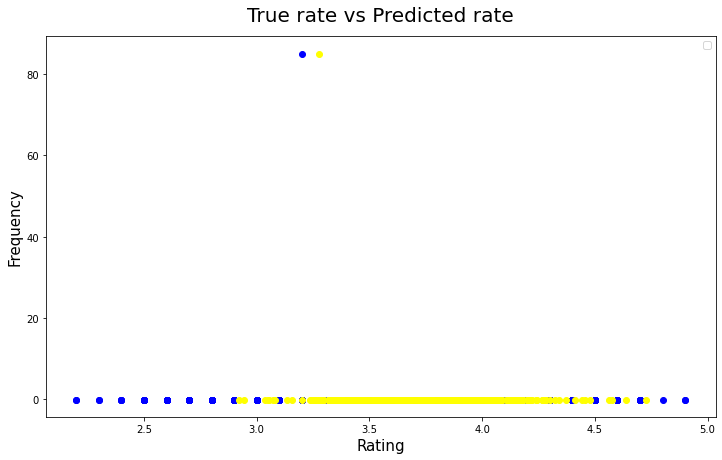

In [53]:
# Plotting the Random Forest values predicted rating
plt.figure(figsize=(12, 7))
plt.scatter(y_test, x_test_scaled[:,2], color='blue')
plt.title('True rate vs Predicted rate', size=20, pad=15)
plt.xlabel('Rating', size=15)
plt.ylabel('Frequency', size=15)
plt.scatter(y_pred_final_xgb_model, x_test_scaled[:,2], color='yellow')
plt.legend()
plt.show()

### deep learning

In [54]:
# x = df.drop('rate', axis=1)
# y = df['rate']
# cat = df.select_dtypes(include='object').columns
# from sklearn.preprocessing import OneHotEncoder
# ohe = OneHotEncoder(drop='first')
# df_final = ohe.fit_transform(x[cat]).toarray()
# x = np.concatenate([df_final, dtt], axis=1) 
# from sklearn.model_selection import train_test_split

# x_train, x_test, y_train, y_test = train_test_split(x , y , test_size=0.2, random_state= 42)

In [55]:
x_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [56]:
y

0        4.1
1        4.1
2        3.8
3        3.7
4        3.8
        ... 
51611    2.5
51614    3.2
51620    3.8
51632    3.3
51677    2.5
Name: rate, Length: 9037, dtype: float64

In [57]:
# from sklearn.preprocessing import StandardScaler

# scaler = StandardScaler(with_mean=False)
# x_train_scaled_deep = scaler.fit_transform(x_train)
# x_test_scaled_deep = scaler.transform(x_test)

In [58]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from  tensorflow.keras import metrics
from tensorflow.keras.models import Sequential
from tensorflow.keras import optimizers 

In [59]:
t_model = Sequential()
t_model.add(layers.Dense(100, activation="relu", input_shape=(x_train_scaled.shape[1],)))
t_model.add(layers.Dense(30, activation="relu"))
t_model.add(layers.Dense(1))


In [60]:
t_model.compile(
    loss="mean_squared_error",
    optimizer=optimizers.experimental.RMSprop(learning_rate=0.01),
    metrics=[metrics.mape])

In [61]:
t_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 100)               30500     
                                                                 
 dense_1 (Dense)             (None, 30)                3030      
                                                                 
 dense_2 (Dense)             (None, 1)                 31        
                                                                 
Total params: 33,561
Trainable params: 33,561
Non-trainable params: 0
_________________________________________________________________


In [62]:
history = t_model.fit(
    x_train_scaled,
    y_train,
    epochs=100,
    batch_size=32,
    validation_split=0.2)
    

Epoch 1/100
181/181 [==============================] - 1s 2ms/step - loss: 1.0087 - mean_absolute_percentage_error: 19.2692 - val_loss: 0.5338 - val_mean_absolute_percentage_error: 16.4825
Epoch 2/100
181/181 [==============================] - 0s 2ms/step - loss: 0.4408 - mean_absolute_percentage_error: 13.5553 - val_loss: 0.2890 - val_mean_absolute_percentage_error: 11.3145
Epoch 3/100
181/181 [==============================] - 0s 2ms/step - loss: 0.3023 - mean_absolute_percentage_error: 11.9988 - val_loss: 0.2949 - val_mean_absolute_percentage_error: 11.6421
Epoch 4/100
181/181 [==============================] - 0s 2ms/step - loss: 0.2507 - mean_absolute_percentage_error: 11.0769 - val_loss: 0.2691 - val_mean_absolute_percentage_error: 11.2809
Epoch 5/100
181/181 [==============================] - 0s 2ms/step - loss: 0.2247 - mean_absolute_percentage_error: 10.4238 - val_loss: 0.2263 - val_mean_absolute_percentage_error: 10.3336
Epoch 6/100
181/181 [==============================] - 

In [63]:
t_model.evaluate(x_test_scaled, y_test)

57/57 [==============================] - 0s 983us/step - loss: 0.2064 - mean_absolute_percentage_error: 10.2043


[0.20635582506656647, 10.204288482666016]

In [64]:
t_model.metrics_names

['loss', 'mean_absolute_percentage_error']

In [65]:
deep_pred = t_model.predict(x_test_scaled)

57/57 [==============================] - 0s 822us/step


In [66]:
final_dataframe = pd.DataFrame({'Actual': y_test, 'Predicted': np.round(deep_pred.flatten(), 1)})

In [67]:
final_dataframe

,Actual,Predicted
4179,3.5,3.3
2650,4.2,3.9
11291,3.3,3.4
4694,3.2,2.5
16355,3.2,3.1
...,...,...
18007,3.9,4.0
7051,4.0,3.9
14616,4.1,3.3
1681,3.1,4.1


### fill **'rate'** values 

In [68]:
df_test

,name,online_order,book_table,rate,votes,location,rest_type,cuisines,approx_cost(for two people),listed_in(type),listed_in(city)
72,Spicy Tandoor,No,No,NEW,0,Banashankari,Quick Bites,North Indian,150,Delivery,Banashankari
75,Om Sri Vinayaka Chats,No,No,NEW,0,Banashankari,"Takeaway, Delivery","Street Food, Fast Food",500,Delivery,Banashankari
84,Chill Out,No,No,NEW,0,Banashankari,Quick Bites,"South Indian, Chinese",100,Delivery,Banashankari
90,Me And My Cake,No,No,NEW,0,Banashankari,Delivery,"Bakery, Desserts",500,Delivery,Banashankari
91,Sunsadm,No,No,NEW,0,Banashankari,"Takeaway, Delivery",South Indian,400,Delivery,Banashankari
...,...,...,...,...,...,...,...,...,...,...,...
51578,The Yellow Stop,No,No,NEW,0,Whitefield,Quick Bites,"Arabian, Chinese, North Indian",500,Dine-out,Whitefield
51579,Arabian Fame Grill,No,No,NEW,0,Whitefield,Food Court,Arabian,600,Dine-out,Whitefield
51587,Shrawan Restaurant,Yes,No,NEW,0,Whitefield,Quick Bites,"North Indian, Chinese",300,Dine-out,Whitefield
51627,New Shalimar Hotel,No,No,NEW,0,"ITPL Main Road, Whitefield",Quick Bites,North Indian,300,Dine-out,Whitefield
